In [1]:
import pandas as pd
import time
import matplotlib.pyplot as plt
 
 
car_price = pd.read_csv("data/car_price.csv")
car_price.head()
 
car_price.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [2]:
car_price.duplicated().sum()

0

In [3]:
car_price.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [4]:
# 提取类别变量的列名
cate_columns=['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','fuelsystem','cylindernumber']

#打印类别变量每个分类的取值情况
for i in cate_columns:
    print(i)
    print(set(car_price[i]))


symboling
{0, 1, 2, 3, -2, -1}
fueltype
{'diesel', 'gas'}
aspiration
{'std', 'turbo'}
doornumber
{'two', 'four'}
carbody
{'hatchback', 'hardtop', 'convertible', 'wagon', 'sedan'}
drivewheel
{'rwd', 'fwd', '4wd'}
enginelocation
{'front', 'rear'}
enginetype
{'dohcv', 'ohcv', 'rotor', 'ohc', 'ohcf', 'dohc', 'l'}
fuelsystem
{'1bbl', 'spdi', '4bbl', 'idi', '2bbl', 'mpfi', 'mfi', 'spfi'}
cylindernumber
{'twelve', 'three', 'five', 'six', 'four', 'eight', 'two'}


In [5]:
#提取变量特征数据(除了'car_ID'和'CarName')
car_df=car_price.drop(['car_ID','CarName'],axis=1)

#查看连续数值型情况，并是检查否有异常值
#对数据进行描述性统计
car_df.describe()


,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


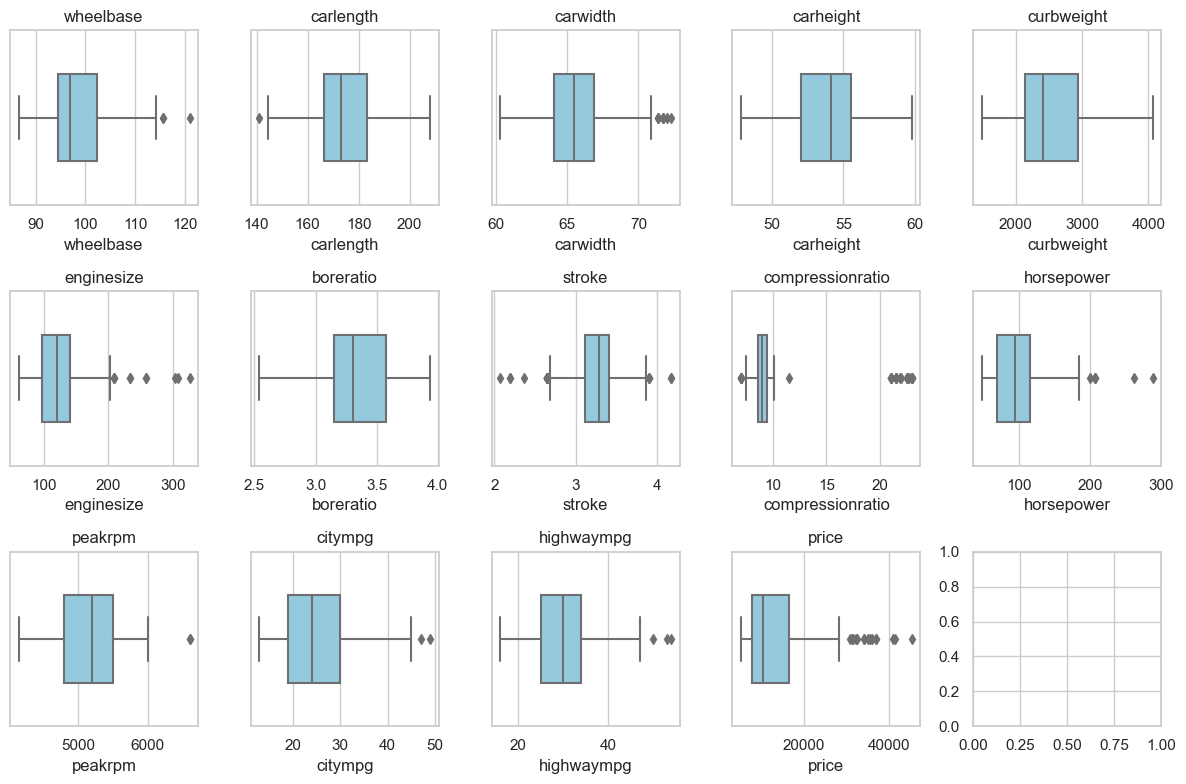

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# 设置Seaborn的样式
sns.set(style="whitegrid")

# 创建一个12x8大小的图形
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 8))

# 将axes展平，方便遍历
axes = axes.flatten()

#提取连续数值型数据的列名
num_cols=car_df.columns.drop(cate_columns)

# 遍历数值型列，绘制箱线图
for i, col in enumerate(num_cols):
    sns.boxplot(x=car_df[col], ax=axes[i], color='skyblue', width=0.5)
    axes[i].set_title(col)

# 调整子图之间的间距
plt.subplots_adjust(wspace=0.4, hspace=0.3)

# 自动调整子图布局，避免标题重合
plt.tight_layout()



In [7]:
#利用split，由CarName拆出品牌信息
carBrand=car_price['CarName'].str.split(expand=True)[0]
#查看汽车品牌名称（过滤重复）
print(set(carBrand))


{'audi', 'Nissan', 'vw', 'bmw', 'alfa-romero', 'mercury', 'vokswagen', 'subaru', 'toyota', 'plymouth', 'honda', 'peugeot', 'volkswagen', 'porcshce', 'dodge', 'jaguar', 'mitsubishi', 'volvo', 'buick', 'toyouta', 'porsche', 'saab', 'chevrolet', 'isuzu', 'renault', 'nissan', 'maxda', 'mazda'}


In [8]:
#修改品牌名称的不规则命名
carBrand=carBrand.replace({'porcshce':'porsche','vokswagen':'volkswagen','Nissan':'nissan','maxda':'mazda','vw':'volkswagen','toyouta':'toyota'})
print(set(carBrand))

#将carBrand放入原数据集中
car_price['carBrand']=carBrand


{'audi', 'bmw', 'alfa-romero', 'mercury', 'subaru', 'toyota', 'plymouth', 'honda', 'peugeot', 'volkswagen', 'dodge', 'jaguar', 'mitsubishi', 'volvo', 'buick', 'porsche', 'saab', 'chevrolet', 'isuzu', 'renault', 'nissan', 'mazda'}


In [9]:
# 由上面描述性统计可知，车身长范围为141.1~208.1英寸之间，可划分为6类
bins=[min(car_df.carlength)-0.01,145.67,169.29,181.10,192.91,200.79,max(car_df.carlength)+0.01]
label=['A00','A0','A','B','C','D']
carSize=pd.cut(car_df.carlength,bins,labels=label)
print(carSize)

#将车型大小分类放入数据集中
car_price['carSize']=carSize
car_df['carSize']=carSize

0      A0
1      A0
2       A
3       A
4       A
       ..
200     B
201     B
202     B
203     B
204     B
Name: carlength, Length: 205, dtype: category
Categories (6, object): ['A00' < 'A0' < 'A' < 'B' < 'C' < 'D']


In [10]:
#查看数值型特征的与价格的相关系数
df_corr=car_df.corr()
df_corr['price'].sort_values(ascending = False)

C:\Users\Morty\AppData\Local\Temp\ipykernel_11720\985329863.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_corr=car_df.corr()


price               1.000000
enginesize          0.874145
curbweight          0.835305
horsepower          0.808139
carwidth            0.759325
carlength           0.682920
wheelbase           0.577816
boreratio           0.553173
carheight           0.119336
stroke              0.079443
compressionratio    0.067984
symboling          -0.079978
peakrpm            -0.085267
citympg            -0.685751
highwaympg         -0.697599
Name: price, dtype: float64

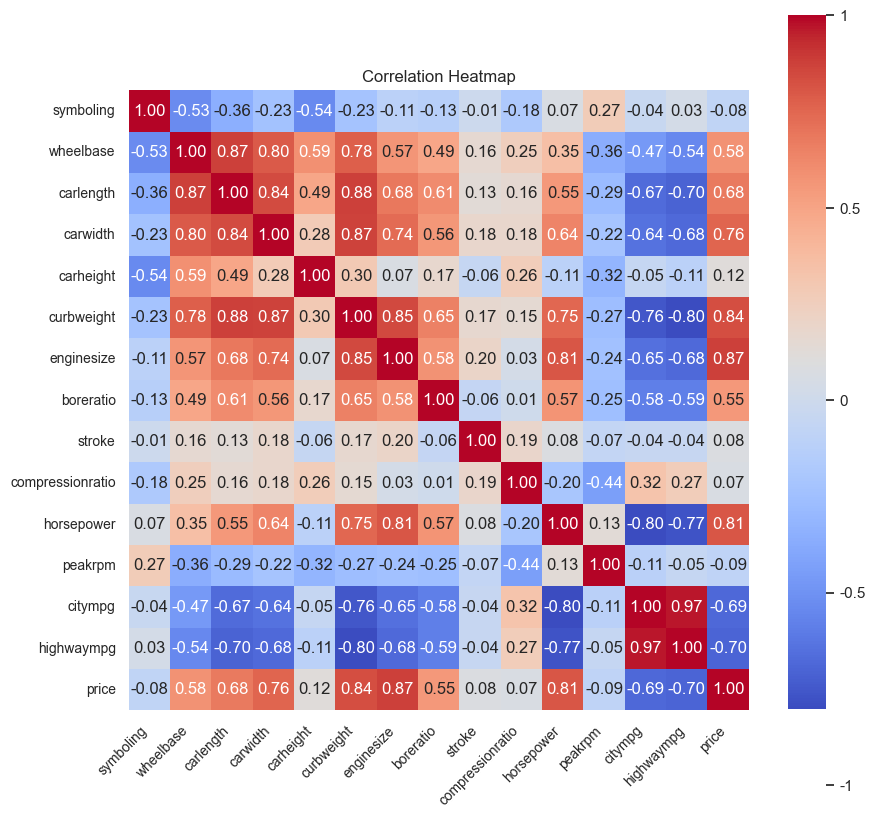

In [11]:
 # 设置图形大小
plt.figure(figsize=(10, 10))

# 使用白色样式
with sns.axes_style("white"):
    # 绘制热力图
    ax = sns.heatmap(df_corr,square=True, annot=True, cmap='coolwarm', fmt=".2f")

    # 设置标题
    ax.set_title("Correlation Heatmap")

    # 调整坐标轴标签字体大小
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=10)
    ax.set_yticklabels(ax.get_yticklabels(), rotation=0, horizontalalignment='right', fontsize=10)

    # 添加颜色条
    cbar = ax.collections[0].colorbar
    cbar.set_ticks([-1, -0.5, 0, 0.5, 1])
    cbar.set_ticklabels(['-1', '-0.5', '0', '0.5', '1'])

In [12]:
#剔除carlength
features=car_df.drop(['carlength'],axis=1)

In [13]:
#剔除carwidth
features=features.drop(['carwidth'],axis=1)

In [14]:
# 将取值具有大小意义的类别型变量数据转变为数值型映射
features1=features.copy()

#使用LabelEncoder对不具实体数值数据编码
from sklearn.preprocessing import LabelEncoder
carSize1=LabelEncoder().fit_transform(features1['carSize'])
features1['carSize']=carSize1


In [15]:
#对于类别离散型特征，取值间没有大小意义的，可采用one-hot编码
cate=features1.select_dtypes(include='object').columns
print(cate)

features1=features1.join(pd.get_dummies(features1[cate])).drop(cate,axis=1)
features1.head()


Index(['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'enginetype', 'cylindernumber', 'fuelsystem'],
      dtype='object')


,symboling,wheelbase,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,...,cylindernumber_twelve,cylindernumber_two,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
1,3,88.6,48.8,2548,130,3.47,2.68,9.0,111,5000,...,0,0,0,0,0,0,0,1,0,0
2,1,94.5,52.4,2823,152,2.68,3.47,9.0,154,5000,...,0,0,0,0,0,0,0,1,0,0
3,2,99.8,54.3,2337,109,3.19,3.40,10.0,102,5500,...,0,0,0,0,0,0,0,1,0,0
4,2,99.4,54.3,2824,136,3.19,3.40,8.0,115,5500,...,0,0,0,0,0,0,0,1,0,0


In [16]:
#对数值型数据进行归一化
from sklearn import preprocessing

features1=preprocessing.MinMaxScaler().fit_transform(features1)
features1=pd.DataFrame(features1)
features1.head()


,0,1,2,3,4,5,6,7,8,9,...,42,43,44,45,46,47,48,49,50,51
0,1.0,0.058309,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.058309,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.262500,0.346939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.6,0.230321,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.441667,0.346939,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.8,0.384840,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.225000,0.551020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.8,0.373178,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.279167,0.551020,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [20]:
#对数据集进行PCA降维（信息保留为99.99%）
from sklearn.decomposition import PCA
import numpy as np 
pca=PCA(n_components=0.9)  #保证降维后的数据保持90%的信息
features2=pca.fit_transform(features1)

#降维后，每个主要成分的解释方差占比（解释PC携带的信息多少）
ratio=pca.explained_variance_ratio_
print('各主成分的解释方差占比：',ratio)

#降维后有几个成分
print('降维后有几个成分：',len(ratio))

#累计解释方差占比
cum_ratio=np.cumsum(ratio)
print('累计解释方差占比：',cum_ratio)


各主成分的解释方差占比： [0.23246988 0.19070874 0.11187697 0.06449677 0.05943769 0.04566066
 0.04230808 0.03664043 0.02997003 0.02214313 0.01994844 0.0191298
 0.01708012 0.01486572]
降维后有几个成分： 14
累计解释方差占比： [0.23246988 0.42317862 0.5350556  0.59955236 0.65899005 0.70465071
 0.74695879 0.78359922 0.81356925 0.83571237 0.85566081 0.87479061
 0.89187073 0.90673644]


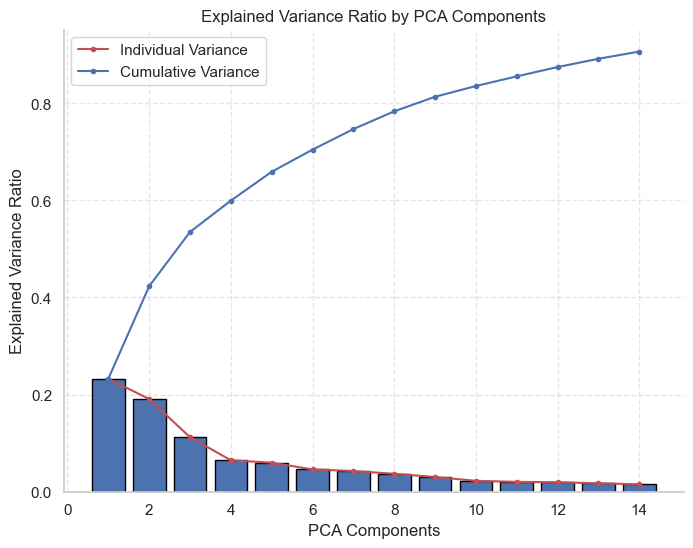

In [21]:
 plt.figure(figsize=(8, 6))
X = range(1, len(ratio) + 1)
Y = ratio
cum_ratio = np.cumsum(ratio)
plt.bar(X, Y, edgecolor='black')
plt.plot(X, Y, 'r.-')
plt.plot(X, cum_ratio, 'b.-')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('PCA Components')
plt.title('Explained Variance Ratio by PCA Components')

# 添加网格线
plt.grid(True, linestyle='--', alpha=0.5)

# 删除顶部和右侧的边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 设置刻度线的样式
plt.tick_params(axis='both', direction='out', length=5, width=1, color='black')

# 添加图例
plt.legend(['Individual Variance', 'Cumulative Variance'], loc='best')

In [34]:
#PCA选择降维保留10个主要成分
pca=PCA(n_components=14) 
features3=pca.fit_transform(features1)

#降维后的累计各成分方差占比和（即解释PC携带的信息多少）
print(sum(pca.explained_variance_ratio_))

0.9067364445688755


Text(0.5, 1.0, 'The Silhouette Coefficient showing the optimal k')

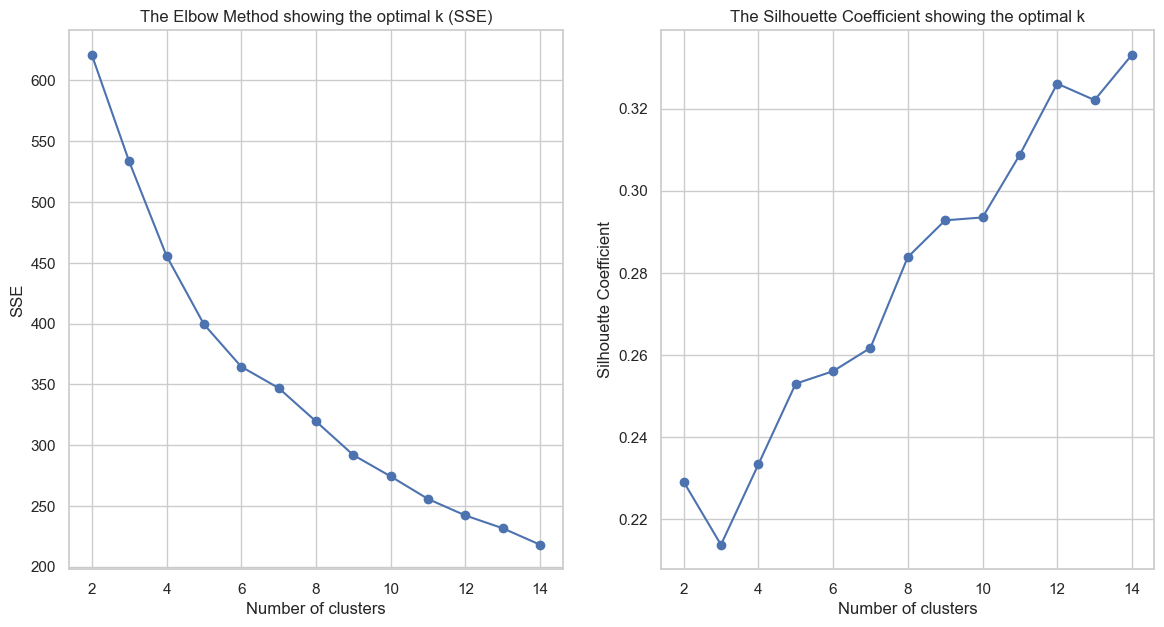

In [35]:
 from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


sse = []
silhouette_coeffs = []

for i in range(2, 15):  # 通常轮廓系数至少从2开始计算
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, random_state=0)
    km.fit(features3)
    sse.append(km.inertia_)
    
    # 计算轮廓系数
    score = silhouette_score(features3, km.labels_)
    silhouette_coeffs.append(score)

# 绘制SSE的图表
plt.figure(figsize=(14, 7))
plt.subplot(1, 2, 1)
plt.plot(range(2, 15), sse, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('The Elbow Method showing the optimal k (SSE)')

# 绘制轮廓系数的图表
plt.subplot(1, 2, 2)
plt.plot(range(2, 15), silhouette_coeffs, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.title('The Silhouette Coefficient showing the optimal k')



Text(0.5, 1.0, 'The Elbow Method')

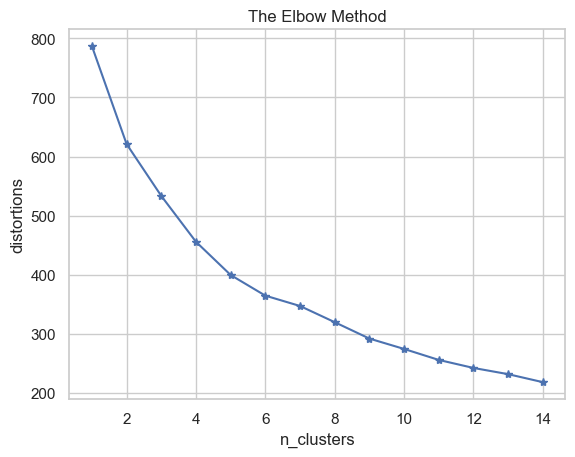

In [36]:
##肘方法看k值，簇内离差平方和
#对每一个k值进行聚类并且记下对于的SSE，然后画出k和SSE的关系图
from sklearn.cluster import KMeans

sse=[]
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(features3)
    sse.append(km.inertia_)

plt.plot(range(1,15),sse,marker='*')
plt.xlabel('n_clusters')
plt.ylabel('distortions')
plt.title("The Elbow Method")

In [37]:
#进行K-Means聚类分析
kmeans=KMeans(n_clusters=9,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(features3)
lab=kmeans.predict(features3)
print(lab)


[6 6 5 2 2 2 2 2 2 0 6 1 5 1 1 1 5 1 3 3 4 3 3 0 4 4 4 0 4 0 3 3 3 3 3 4 4
 3 3 4 4 2 3 4 3 4 6 1 1 5 3 3 3 4 4 6 6 6 6 3 4 3 4 8 4 1 8 7 7 7 7 1 5 1
 5 0 3 3 3 0 0 3 0 0 0 4 4 0 4 3 8 3 4 4 3 3 4 4 3 4 4 2 2 2 5 5 5 1 7 1 7
 1 7 1 7 1 7 1 3 0 4 4 4 4 0 6 5 5 5 5 2 3 3 2 3 2 0 2 3 3 3 4 4 2 4 1 4 2
 4 1 3 3 4 4 4 4 4 4 8 8 4 4 4 3 3 6 6 6 6 6 6 6 6 2 8 2 2 2 5 5 1 1 8 2 8
 2 2 8 2 3 3 2 8 2 1 1 1 1 1 1 1 1 1 7 1]


Text(0.5, 1.0, 'K-Means PCA')

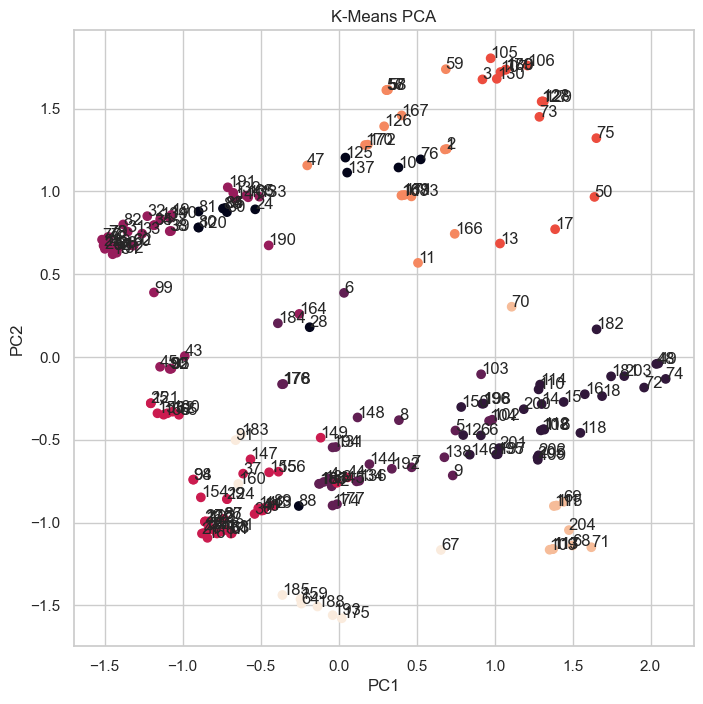

In [38]:
#绘制聚类结果2维的散点图
plt.figure(figsize=(8,8))
plt.scatter(features3[:,0],features3[:,1],c=lab)
for ii in np.arange(205):
    plt.text(features3[ii,0],features3[ii,1],s=car_price.car_ID[ii])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means PCA')

Text(0.5, 0, 'PC3')

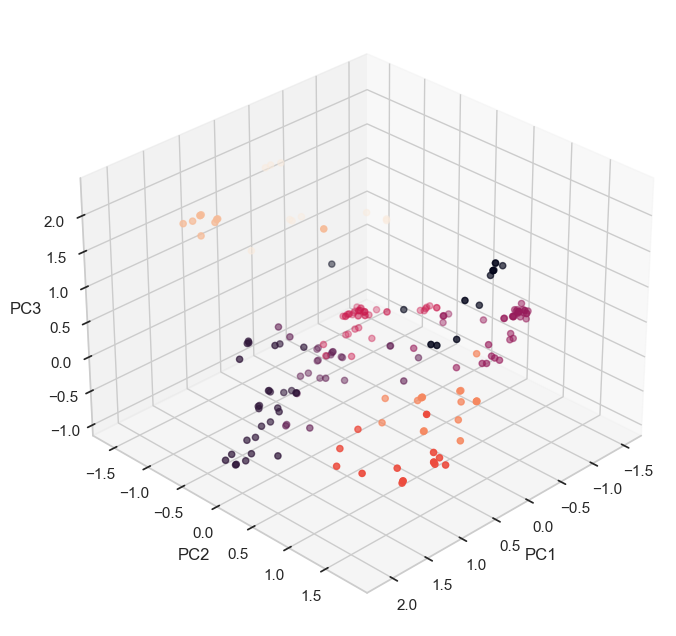

In [39]:
#绘制聚类结果后3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(8,8))
ax=plt.subplot(111,projection='3d')
ax.scatter(features3[:,0],features3[:,1],features3[:,2],c=lab)
#视角转换，转换后更易看出簇群
ax.view_init(30,45) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')

Cluster 4: 28 samples
Cluster 0: 63 samples
Cluster 1: 47 samples
Cluster 3: 47 samples
Cluster 2: 20 samples


Text(0.5, 1.0, 'Hierarchical Clustering')

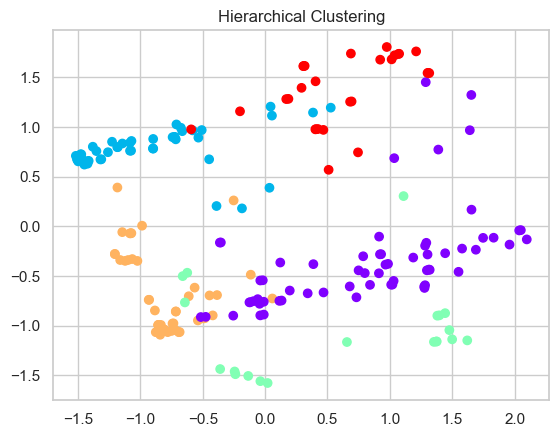

In [52]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
 
clustering = AgglomerativeClustering(n_clusters=5)

# 拟合模型
clustering.fit(features3)
# 获取每个样本所属的簇标签
labels = clustering.labels_

# 计算每个簇的数量
cluster_counts = Counter(labels)

# 打印簇及其对应的样本数量
for cluster, count in cluster_counts.items():
    print(f'Cluster {cluster}: {count} samples')
# 可视化结果
plt.scatter(features3[:, 0], features3[:, 1], c=clustering.labels_, cmap='rainbow')
plt.title('Hierarchical Clustering')

Text(0.5, 1.0, 'Hierarchical Clustering Dendrogram')

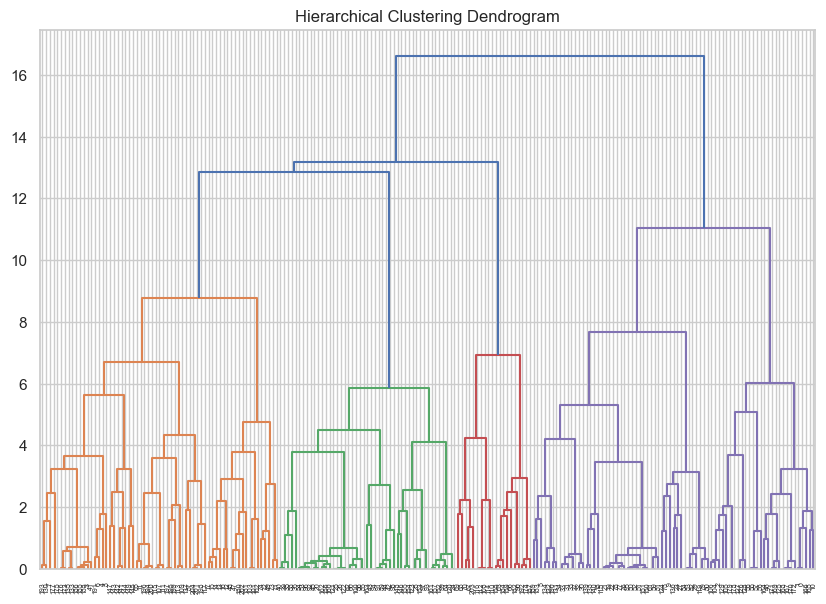

In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 使用 linkage() 方法进行层次聚类
linked = linkage(features3, method='ward')

# 绘制树状图
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram')

In [48]:
from sklearn.metrics import silhouette_score

best_silhouette = -1
best_k = 0

for i in range(2, 15):  # 轮廓系数至少从2个簇开始计算
    clustering = AgglomerativeClustering(n_clusters=i)
    labels = clustering.fit_predict(features3)
    
    silhouette_avg = silhouette_score(features3, labels)
    print(f'For n_clusters = {i}, the average silhouette_score is : {silhouette_avg}')
    
    if silhouette_avg > best_silhouette:
        best_silhouette = silhouette_avg
        best_k = i

print("Best number of clusters based on silhouette score:", best_k)


For n_clusters = 2, the average silhouette_score is : 0.1849529753032016
For n_clusters = 3, the average silhouette_score is : 0.2177786757599083
For n_clusters = 4, the average silhouette_score is : 0.19807576137824465
For n_clusters = 5, the average silhouette_score is : 0.2255308940759307
For n_clusters = 6, the average silhouette_score is : 0.23110522288043361
For n_clusters = 7, the average silhouette_score is : 0.25068204571065683
For n_clusters = 8, the average silhouette_score is : 0.26339777308185763
For n_clusters = 9, the average silhouette_score is : 0.2701137958941468
For n_clusters = 10, the average silhouette_score is : 0.27951840827812807
For n_clusters = 11, the average silhouette_score is : 0.28838977233989477
For n_clusters = 12, the average silhouette_score is : 0.3000400980827043
For n_clusters = 13, the average silhouette_score is : 0.31098296915311113
For n_clusters = 14, the average silhouette_score is : 0.3267445442798167
Best number of clusters based on silhou

Text(0, 0.5, 'WCSS')

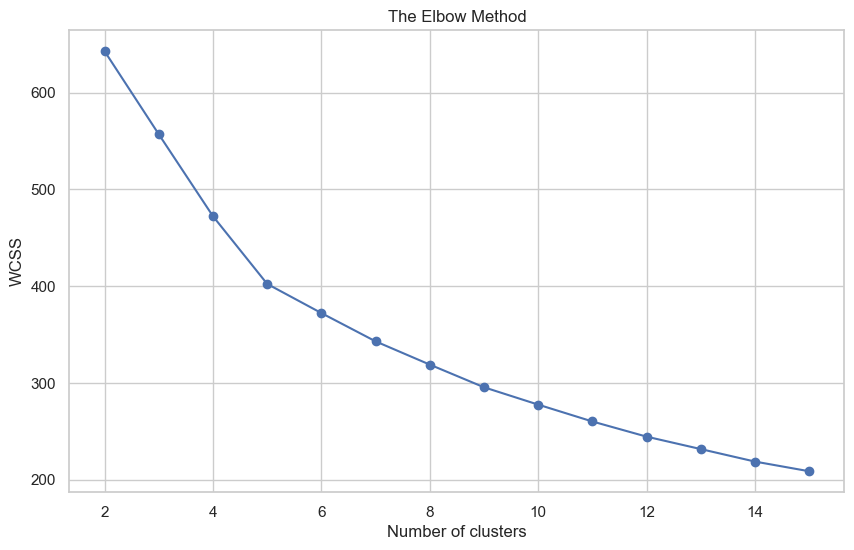

In [49]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial.distance import cdist

 

# 试验不同的簇数从2到15
clusters_range = range(2, 16)
wcss = []

for n_clusters in clusters_range:
    # 创建并拟合模型
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(features3)
    
    # 找出每个簇的质心
    centroids = []
    for k in range(n_clusters):
        centroid = features3[cluster_labels == k].mean(axis=0)
        centroids.append(centroid)
    
    # 计算簇内误差平方和
    wcss.append(sum(np.min(cdist(features3, centroids, 'euclidean'), axis=1) ** 2))

# 绘制肘部曲线图
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, wcss, marker='o')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # Within-cluster sum of squares

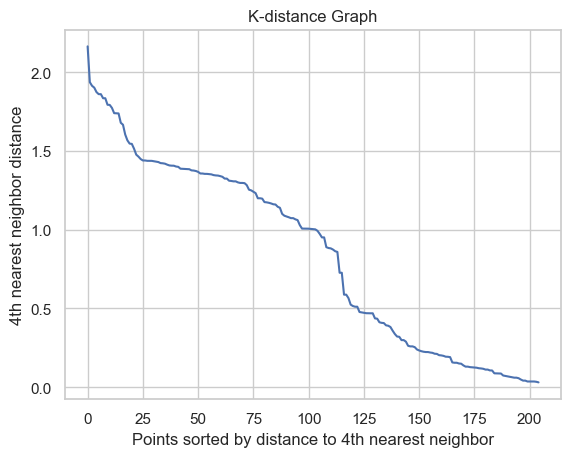

For eps=0.1, the average silhouette_score is: -0.17613527102165247
For eps=0.2, the average silhouette_score is: 0.014654483296229454
For eps=0.30000000000000004, the average silhouette_score is: 0.10053522187973178
For eps=0.4, the average silhouette_score is: 0.13927401369725592
For eps=0.5, the average silhouette_score is: 0.15748664252276343
For eps=0.6, the average silhouette_score is: 0.16437870926387735
For eps=0.7000000000000001, the average silhouette_score is: 0.16437870926387735
For eps=0.8, the average silhouette_score is: 0.16437870926387735
For eps=0.9, the average silhouette_score is: 0.21553481929488755


In [50]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.neighbors import NearestNeighbors
import numpy as np
import matplotlib.pyplot as plt

 
# 使用NearestNeighbors寻找K-distance
neigh = NearestNeighbors(n_neighbors=4)
nbrs = neigh.fit(features3)
distances, indices = nbrs.kneighbors(features3)

# 绘制K-distance Graph
distanceDec = sorted(distances[:, 3], reverse=True)
plt.plot(indices[:, 0], distanceDec)
plt.title('K-distance Graph')
plt.xlabel('Points sorted by distance to 4th nearest neighbor')
plt.ylabel('4th nearest neighbor distance')
plt.show()

# 推荐的eps值通常是图中的肘点

# 测试不同的eps值
for eps in np.arange(0.1, 1.0, 0.1):
    db = DBSCAN(eps=eps, min_samples=4).fit(features3)
    labels = db.labels_
    
    # 忽略噪声点的轮廓系数计算
    if len(set(labels)) > 1:
        silhouette_avg = silhouette_score(features3, labels)
        print(f'For eps={eps}, the average silhouette_score is: {silhouette_avg}')
    else:
        print(f'For eps={eps}, only one cluster or noise is detected.')


Estimated number of clusters: 8
Estimated number of noise points: 131


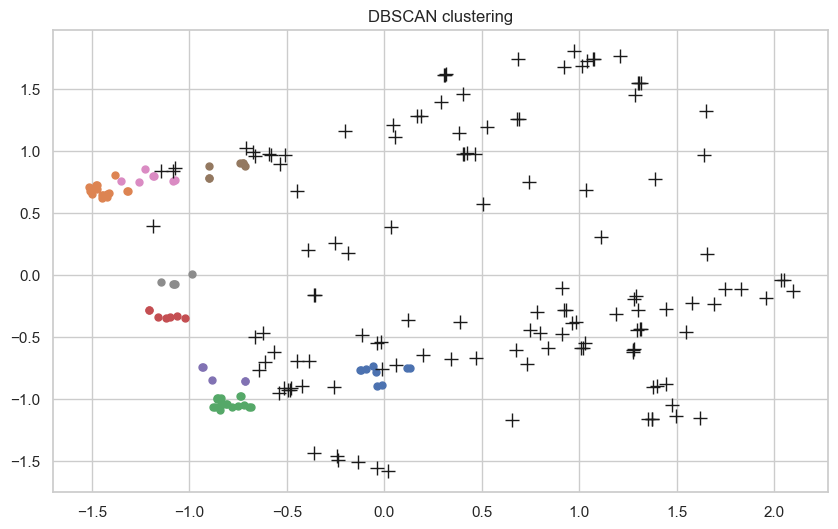

In [51]:
 from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# 应用DBSCAN算法
# eps和min_samples是DBSCAN的两个重要参数
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 拟合模型
dbscan.fit(features3)

# 获取每个数据点的簇标签
labels = dbscan.labels_

# 获取噪声点的数量（标签为-1的点被认为是噪声）
n_noise = list(labels).count(-1)

# 绘制结果
# 为了清楚地表示出噪声点，我们将它们用不同的颜色和标记表示
plt.figure(figsize=(10, 6))
unique_labels = set(labels)
for label in unique_labels:
    class_member_mask = (labels == label)
    if label == -1:
        # 使用黑色表示噪声点
        plt.plot(features3[class_member_mask, 0], features3[class_member_mask, 1], 'k+', markersize=10)
    else:
        plt.plot(features3[class_member_mask, 0], features3[class_member_mask, 1], 'o', markersize=5)

plt.title('DBSCAN clustering')

print(f'Estimated number of clusters: {len(set(labels)) - (1 if -1 in labels else 0)}')
print(f'Estimated number of noise points: {n_noise}')


In [64]:
from sklearn.metrics import silhouette_score

# 使用K-Means算法进行聚类
kmeans = KMeans(n_clusters=9, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(features3)

# 获取聚类结果的标签
labels = kmeans.labels_

# 计算轮廓系数
silhouette_avg = silhouette_score(features3, labels)
print("The average silhouette_score is:", silhouette_avg)

The average silhouette_score is: 0.29280065733123356


In [54]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
 
clustering = AgglomerativeClustering(n_clusters=5)

# 拟合模型
clustering.fit(features3)
# 获取每个样本所属的簇标签
labels = clustering.labels_

# 计算轮廓系数
silhouette_avg = silhouette_score(features3, labels)
print("The average silhouette_score is:", silhouette_avg)

The average silhouette_score is: 0.2255308940759307


In [55]:
 from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# 应用DBSCAN算法
# eps和min_samples是DBSCAN的两个重要参数
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 拟合模型
dbscan.fit(features3)

# 获取每个数据点的簇标签
labels = dbscan.labels_

 # 计算轮廓系数
silhouette_avg = silhouette_score(features3, labels)
print("The average silhouette_score is:", silhouette_avg)

The average silhouette_score is: 0.15870678511861017


In [62]:
from sklearn.metrics import davies_bouldin_score
# 使用K-Means算法进行聚类
kmeans = KMeans(n_clusters=8, init='k-means++', n_init=10, max_iter=300, random_state=0)
kmeans.fit(features3)

# 获取聚类结果的标签
labels = kmeans.labels_

# 计算Davies-Bouldin指数
db_index = davies_bouldin_score(features3, labels)
print("The Davies-Bouldin index is:", db_index) 

The Davies-Bouldin index is: 1.3075314029582157


In [57]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter
 
clustering = AgglomerativeClustering(n_clusters=5)

# 拟合模型
clustering.fit(features3)
# 获取每个样本所属的簇标签
labels = clustering.labels_

 # 计算Davies-Bouldin指数
db_index = davies_bouldin_score(features3, labels)
print("The Davies-Bouldin index is:", db_index) 

The Davies-Bouldin index is: 1.4885628151475694


In [58]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt


# 应用DBSCAN算法
# eps和min_samples是DBSCAN的两个重要参数
dbscan = DBSCAN(eps=0.5, min_samples=5)

# 拟合模型
dbscan.fit(features3)

# 获取每个数据点的簇标签
labels = dbscan.labels_
# 计算Davies-Bouldin指数
db_index = davies_bouldin_score(features3, labels)
print("The Davies-Bouldin index is:", db_index) 

The Davies-Bouldin index is: 1.150128315154938


In [66]:
kmeans=KMeans(n_clusters=9,init='k-means++',n_init=10,max_iter=300,random_state=0)
y_pred=kmeans.fit_predict(features3)
print(y_pred)

#将聚类后的类目放入原特征数据中
car_df_km=car_price.copy()
car_df_km['km_result']=y_pred

[6 6 5 2 2 2 2 2 2 0 6 1 5 1 1 1 5 1 3 3 4 3 3 0 4 4 4 0 4 0 3 3 3 3 3 4 4
 3 3 4 4 2 3 4 3 4 6 1 1 5 3 3 3 4 4 6 6 6 6 3 4 3 4 8 4 1 8 7 7 7 7 1 5 1
 5 0 3 3 3 0 0 3 0 0 0 4 4 0 4 3 8 3 4 4 3 3 4 4 3 4 4 2 2 2 5 5 5 1 7 1 7
 1 7 1 7 1 7 1 3 0 4 4 4 4 0 6 5 5 5 5 2 3 3 2 3 2 0 2 3 3 3 4 4 2 4 1 4 2
 4 1 3 3 4 4 4 4 4 4 8 8 4 4 4 3 3 6 6 6 6 6 6 6 6 2 8 2 2 2 5 5 1 1 8 2 8
 2 2 8 2 3 3 2 8 2 1 1 1 1 1 1 1 1 1 7 1]


km_result
0    14
1    30
2    26
3    40
4    43
5    15
6    17
7    10
8    10
Name: car_ID, dtype: int64


Text(0.5, 1.0, 'Number of Cars in Each Cluster')

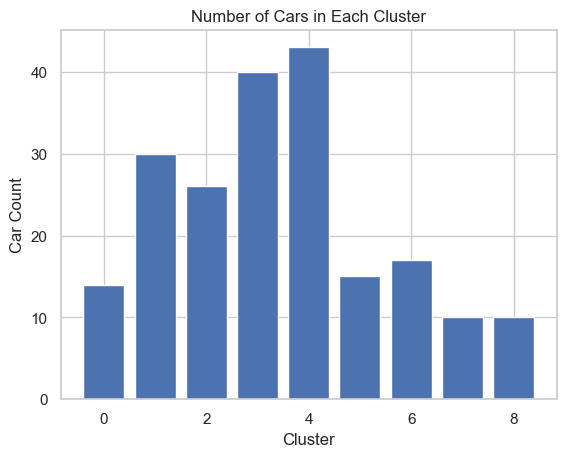

In [68]:
# 统计每个集群的车型数
cluster_counts = car_df_km.groupby('km_result')['car_ID'].count()

# 打印每个集群的车型数
print(cluster_counts)

# 可视化
plt.bar(cluster_counts.index, cluster_counts.values)
plt.xlabel('Cluster')
plt.ylabel('Car Count')
plt.title('Number of Cars in Each Cluster')

In [69]:
#统计每个集群各个品牌的车型数
car_df_km.groupby(by=['km_result','carBrand'])['car_ID'].count()  

km_result  carBrand  
0          audi          1
           dodge         3
           mercury       1
           mitsubishi    6
           plymouth      2
                        ..
7          volvo         1
8          mazda         2
           nissan        1
           toyota        3
           volkswagen    4
Name: car_ID, Length: 65, dtype: int64

In [70]:
#统计每个品牌所属各个集群的车型数
car_df_km.groupby(by=['carBrand','km_result'])['km_result'].count()

carBrand     km_result
alfa-romero  5             1
             6             2
audi         0             1
             2             6
bmw          1             5
                          ..
volkswagen   2             6
             3             2
             8             4
volvo        1            10
             7             1
Name: km_result, Length: 65, dtype: int64

In [72]:
#查看特指车名‘bmw x1’车型的聚类集群
df=car_df_km.loc[:,['car_ID','CarName','carBrand','km_result']]
print(df.loc[df['CarName'].str.contains("bmw x1")])

    car_ID CarName carBrand  km_result
12      13  bmw x1      bmw          5


In [74]:
df.loc[df['km_result']==5]

,car_ID,CarName,carBrand,km_result
2,3,alfa-romero Quadrifoglio,alfa-romero,5
12,13,bmw x1,bmw,5
16,17,bmw x5,bmw,5
49,50,jaguar xk,jaguar,5
72,73,buick skylark,buick,5
74,75,buick regal sport coupe (turbo),buick,5
104,105,nissan teana,nissan,5
105,106,nissan kicks,nissan,5
106,107,nissan clipper,nissan,5
126,127,porcshce panamera,porsche,5


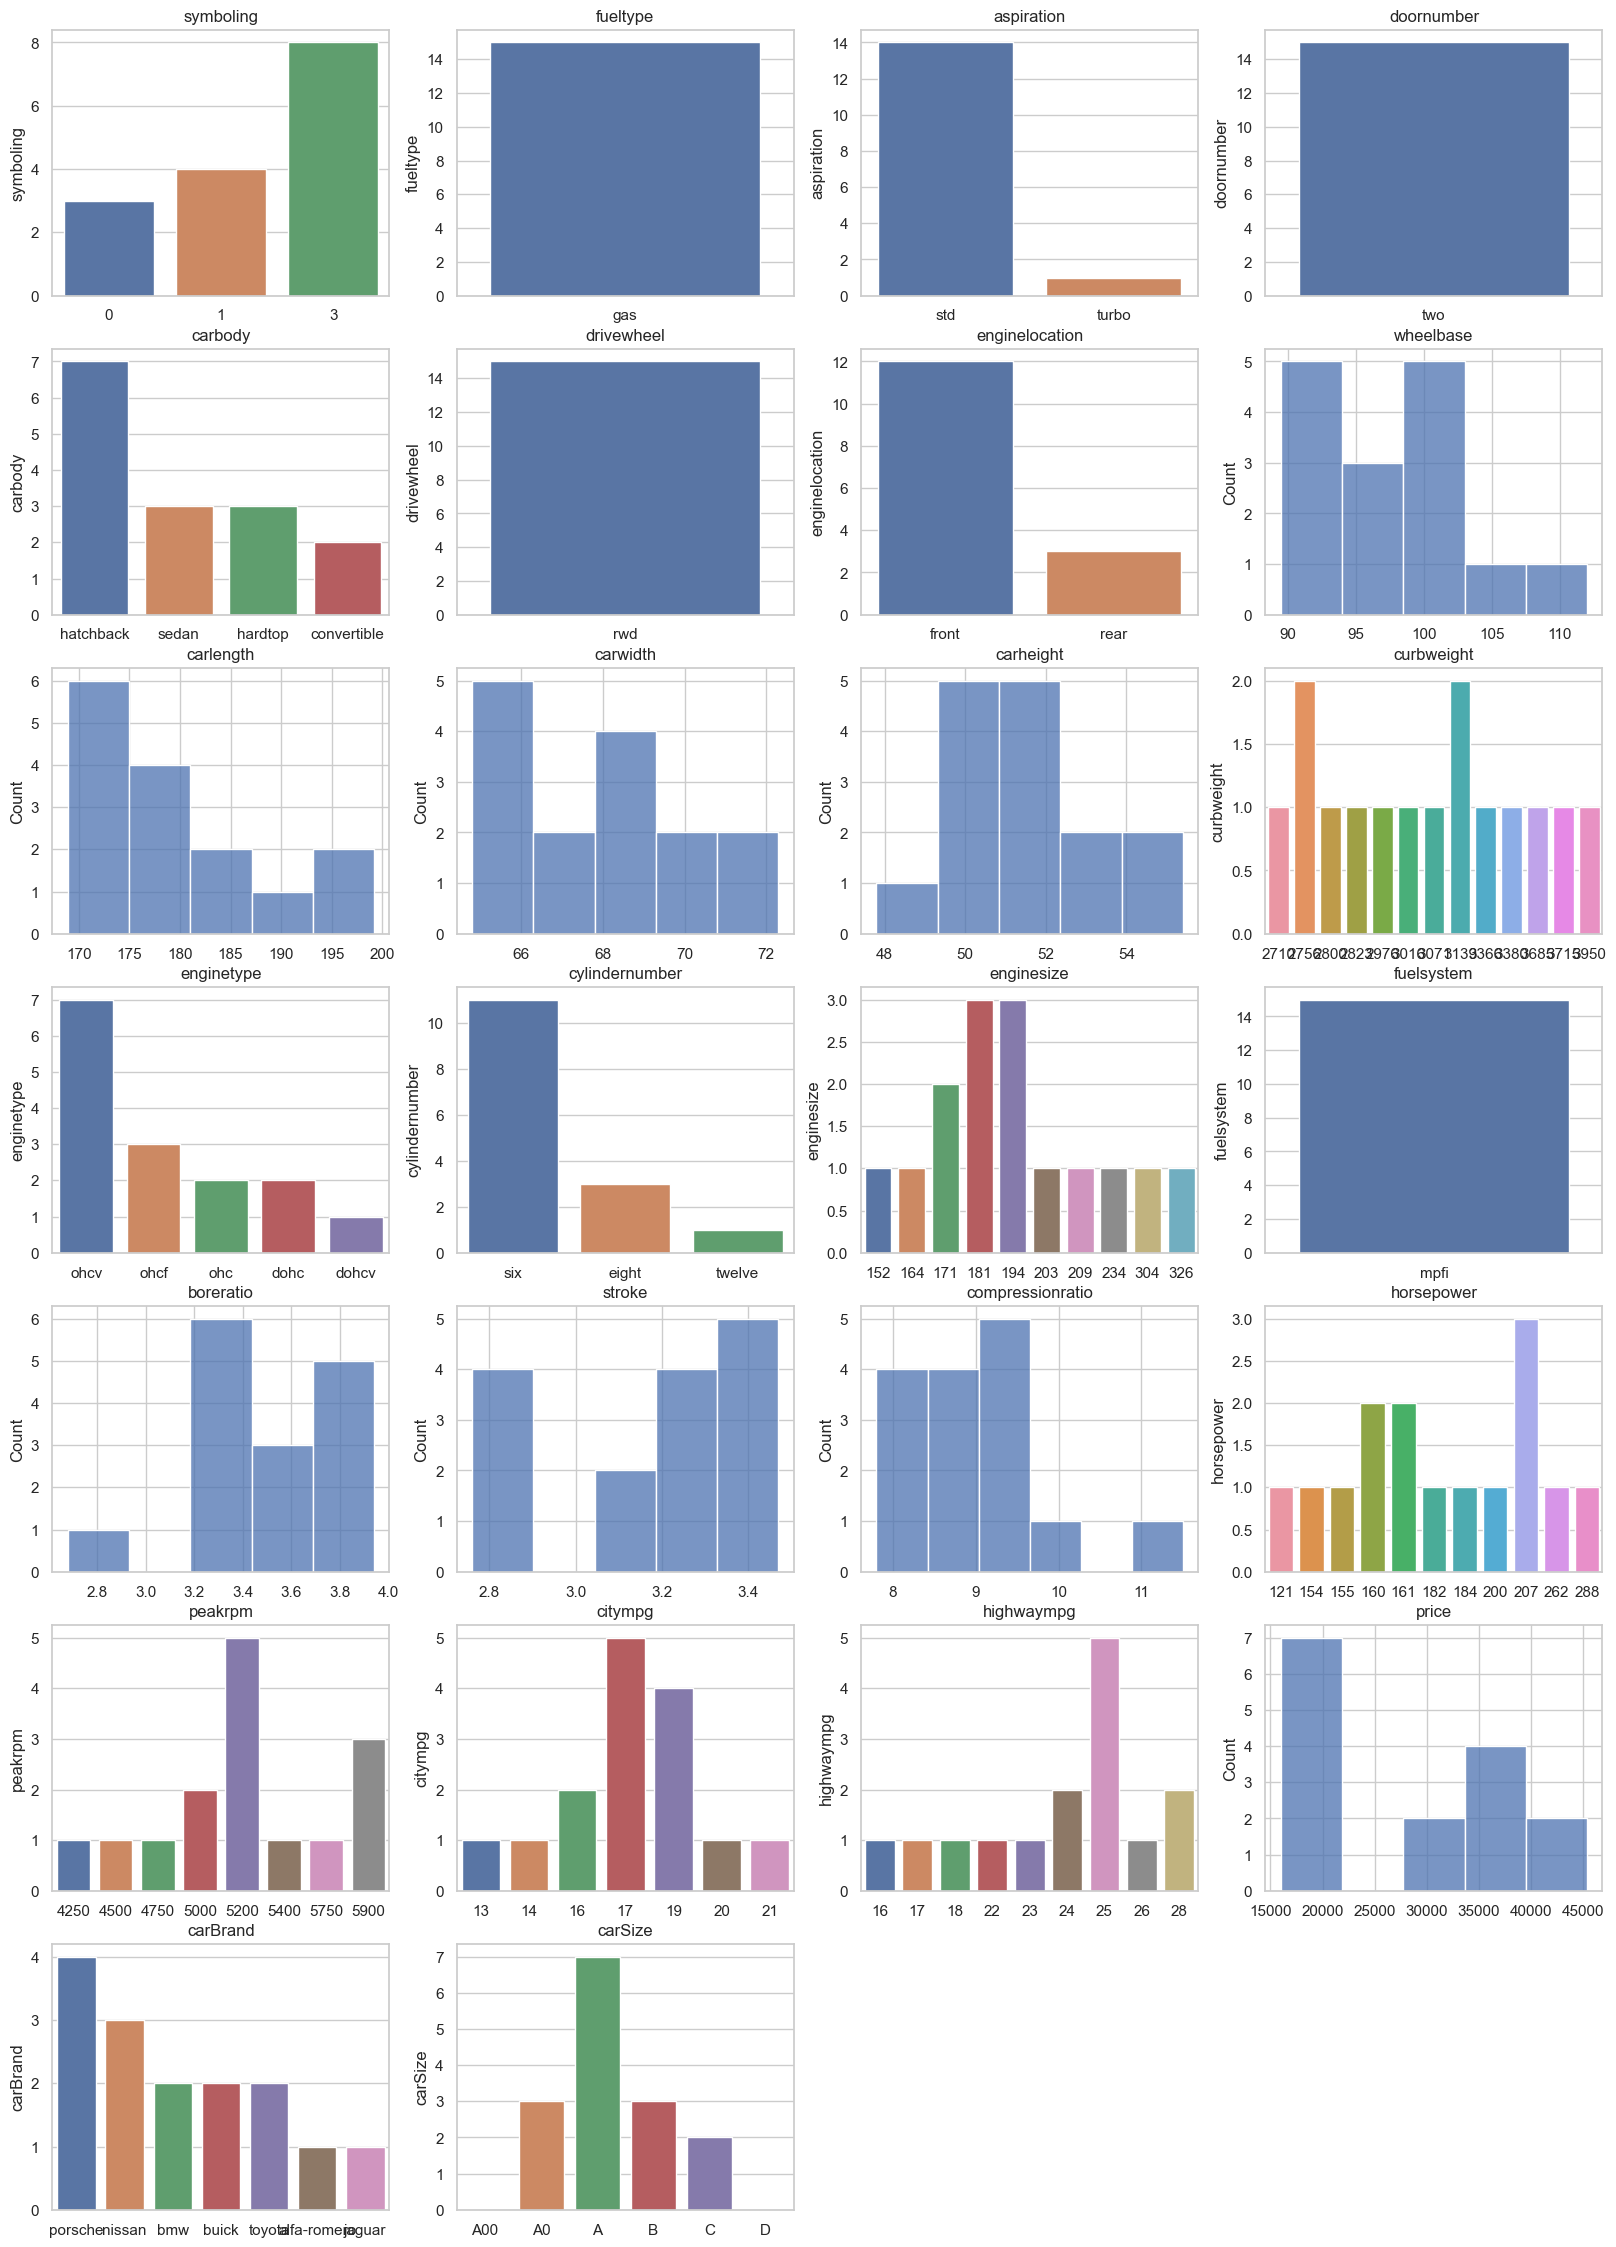

In [78]:
 df0_1 = df0.drop(['car_ID', 'CarName', 'km_result'], axis=1)

# 查看集群0的车型所有特征分布
fig = plt.figure(figsize=(20, 20))
i = 1
for c in df0_1.columns:
    ax = fig.add_subplot(7, 4, i)
    if df0_1[c].dtypes == 'int' or df0_1[c].dtypes == 'float':
        sns.histplot(df0_1[c], ax=ax)
    else:
        counts = df0_1[c].value_counts()
        sns.barplot(x=counts.index, y=counts, ax=ax)
    i = i + 1
    plt.xlabel('')
    plt.title(c)
plt.subplots_adjust(top=1.2)

In [84]:
df=df0.loc[:,['car_ID','CarName','carBrand','km_result','carSize']]
print(df.loc[df['CarName'].str.contains("bmw x1")])

    car_ID CarName carBrand  km_result carSize
12      13  bmw x1      bmw          5       A


In [85]:
#提取集群0中的A级车
df0_A=df0.loc[df0['carSize']=='A']

In [86]:
df0_A

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carBrand,carSize,km_result
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,3.47,9.0,154,5000,19,26,16500.0,alfa-romero,A,5
12,13,0,bmw x1,gas,std,two,sedan,rwd,front,101.2,...,3.19,9.0,121,4250,21,28,20970.0,bmw,A,5
72,73,3,buick skylark,gas,std,two,convertible,rwd,front,96.6,...,3.10,8.3,155,4750,16,18,35056.0,buick,A,5
104,105,3,nissan teana,gas,std,two,hatchback,rwd,front,91.3,...,3.27,9.0,160,5200,19,25,17199.0,nissan,A,5
105,106,3,nissan kicks,gas,turbo,two,hatchback,rwd,front,91.3,...,3.27,7.8,200,5200,17,23,19699.0,nissan,A,5
106,107,1,nissan clipper,gas,std,two,hatchback,rwd,front,99.2,...,3.27,9.0,160,5200,19,25,18399.0,nissan,A,5
129,130,1,porsche cayenne,gas,std,two,hatchback,rwd,front,98.4,...,3.11,10.0,288,5750,17,28,31400.5,porsche,A,5


In [87]:
#查看集群0中A级车型的类别型变量的分类情况
ate_col=df0_A.select_dtypes(include='object').columns

df3=df0_A[ate_col]
df3

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,carBrand
2,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
12,bmw x1,gas,std,two,sedan,rwd,front,ohc,six,mpfi,bmw
72,buick skylark,gas,std,two,convertible,rwd,front,ohcv,eight,mpfi,buick
104,nissan teana,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,nissan
105,nissan kicks,gas,turbo,two,hatchback,rwd,front,ohcv,six,mpfi,nissan
106,nissan clipper,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,nissan
129,porsche cayenne,gas,std,two,hatchback,rwd,front,dohcv,eight,mpfi,porsche
